In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(1030, 6)

In [19]:
digits["true_label"].value_counts()

true_label
4    103
2    103
1    103
3    103
5    103
6    103
7    103
8    103
9    103
0    103
Name: count, dtype: int64

<Axes: xlabel='true_label', ylabel='Count'>

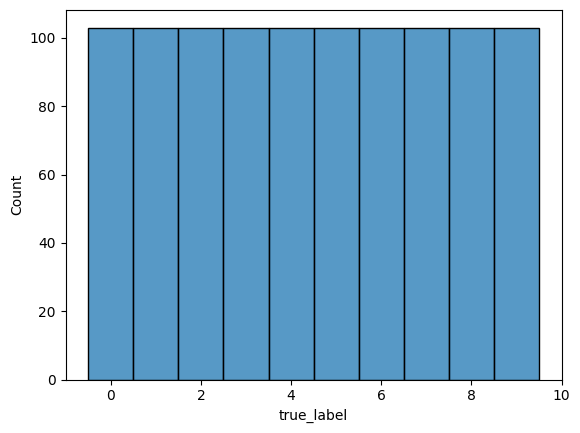

In [20]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [21]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:2] == "09"]
oct = digits[digits["timestamp"].str[:2] == "10"]
nov = digits[digits["timestamp"].str[:2] == "11"]

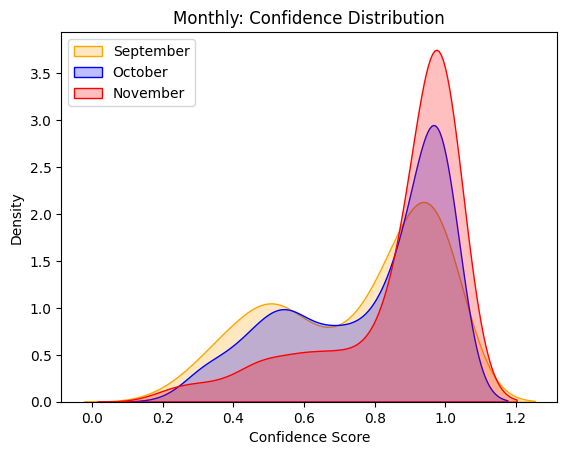

In [22]:
sns.kdeplot(sept, x="confidence", color="orange", fill=True, label="September")
sns.kdeplot(oct, x="confidence", color="blue", fill=True, label="October")
sns.kdeplot(nov, x="confidence", color="red", fill=True, label="November")
plt.title("Monthly: Confidence Distribution")  # no retrain at this point
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.legend()

In [23]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(1030, 784)


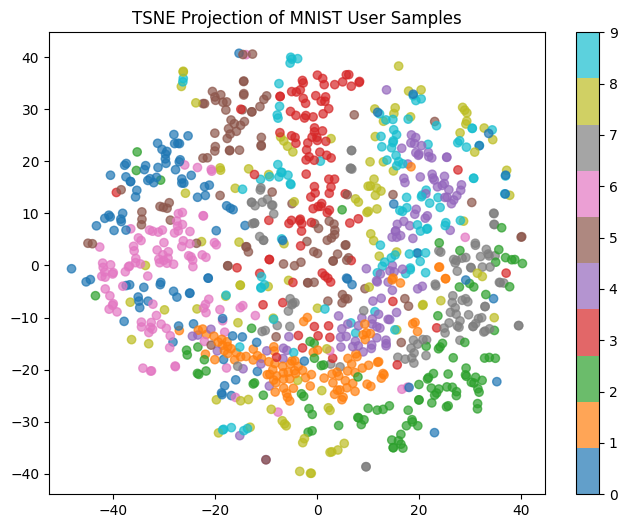

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()


In [27]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=3000)
tsne_result = tsne.fit_transform(image_vectors)
print(tsne_result)

[[-32.892845    6.1455035  45.42609  ]
 [-28.758343   34.911682   27.8923   ]
 [ -2.7530208  34.40711   -70.2995   ]
 ...
 [-87.81222     4.211083  -22.450708 ]
 [-77.23655    -9.680858   69.86137  ]
 [-19.726366  -60.707985   68.96362  ]]


0       4
1       2
2       1
3       1
4       1
       ..
1025    5
1026    6
1027    7
1028    8
1029    9
Name: true_label, Length: 1030, dtype: int64


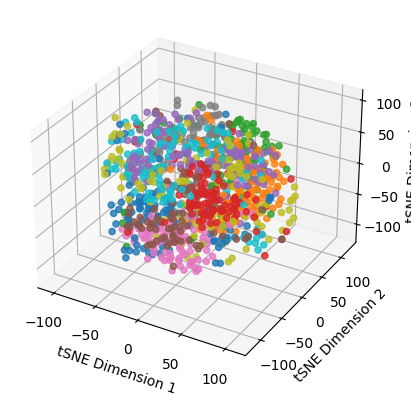

In [28]:
# graph visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = digits.true_label
print(colors)
ax.scatter(
    tsne_result[:,0],
    tsne_result[:,1],
    tsne_result[:,2],
    c=colors,
    cmap="tab10",
    alpha=0.8
)

ax.set_xlabel("tSNE Dimension 1")
ax.set_ylabel("tSNE Dimension 2")
ax.set_zlabel("tSNE Dimension 3")
plt.show()